In [1]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nsepy import get_history
from datetime import date



Using TensorFlow backend.


In [2]:
symbol = input("Enter symbol of stock\n")

df = get_history(symbol=symbol, start=date(2010,1,1), end=date.today())
df['Date'] = df.index

Enter symbol of stock
reliance


In [41]:
df.tail()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2020-04-30,RELIANCE,EQ,1426.95,1453.95,1494.95,1438.05,1464.00,1466.00,1467.88,32617901,4.787926e+15,663204.0,9287707,0.2847,2020-04-30
2020-05-04,RELIANCE,EQ,1466.00,1440.00,1465.00,1417.45,1435.00,1435.20,1442.94,24439240,3.526436e+15,544309.0,8018280,0.3281,2020-05-04
2020-05-05,RELIANCE,EQ,1435.20,1453.70,1479.00,1447.20,1462.65,1460.65,1464.23,20528706,3.005870e+15,412545.0,4924874,0.2399,2020-05-05
2020-05-06,RELIANCE,EQ,1460.65,1464.00,1484.95,1445.50,1461.50,1460.75,1468.54,18510304,2.718320e+15,425042.0,4155906,0.2245,2020-05-06
2020-05-07,RELIANCE,EQ,1460.75,1455.00,1513.65,1445.00,1512.00,1506.95,1484.86,22871529,3.396107e+15,465254.0,5286803,0.2312,2020-05-07


In [7]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Date'],
      dtype='object')

In [29]:
# import plotly.offline as pyo
# import plotly.graph_objs as go
# from plotly.offline import iplot

# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


# # cf.go_offline()

# # def configure_plotly_browser_state():
# #   import IPython
# #   display(IPython.core.display.HTML('''
# #         <script src="/static/components/requirejs/require.js"></script>
# #         <script>
# #           requirejs.config({
# #             paths: {
# #               base: '/static/base',
# #               plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
# #             },
# #           });
# #         </script>
# #         '''))
    
# # configure_plotly_browser_state()
# # init_notebook_mode(connected=False)

# df.iplot(kind='scatter', x='Date', y='Close',color=['gold'], 
# theme='solar', mode='lines', xTitle='Date', yTitle='Close Price')

# plt.show()

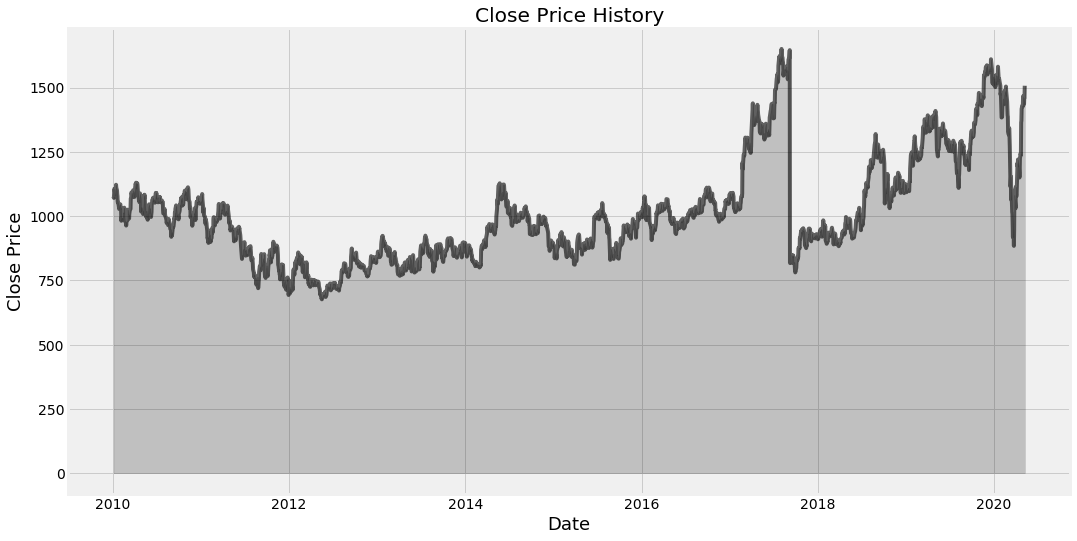

In [34]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
#plt.plot(df['Close'])
plt.fill_between( df['Date'], df['Close'], color="black", alpha=0.2)
plt.plot(df['Date'], df['Close'], color="black", alpha=0.6)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

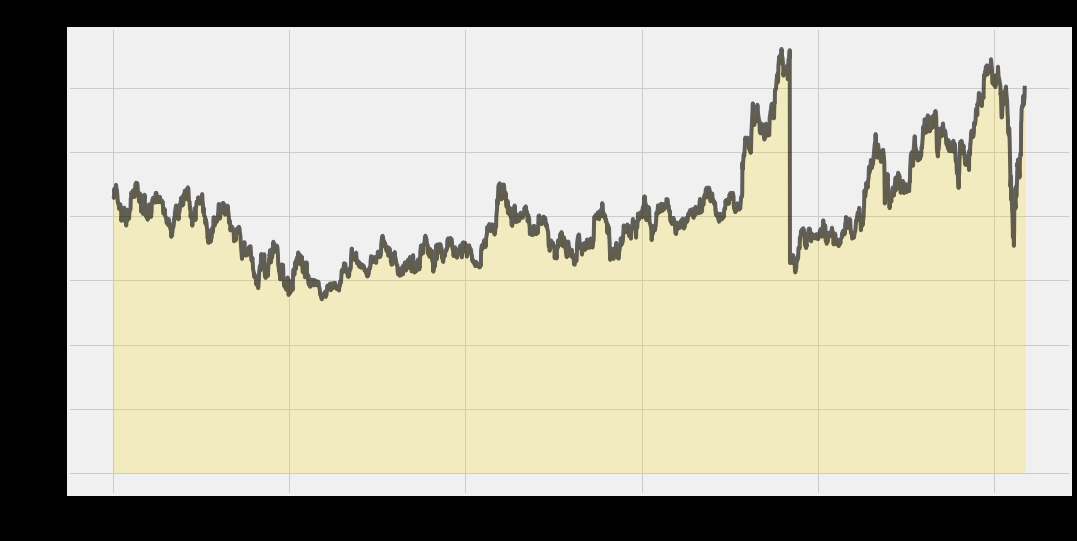

In [23]:
plt.figure(figsize=(16,8))
plt.fill_between( df['Date'], df['Close'], color="gold", alpha=0.2)
plt.plot(df['Date'], df['Close'], color="black", alpha=0.6)
#Visualize the closing price history
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [9]:
#Create a new dataframe with only the 'feature' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.75)

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]

#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
x_train


array([[[0.4100616 ],
        [0.40513347],
        [0.42289528],
        ...,
        [0.31724846],
        [0.34810062],
        [0.34281314]],

       [[0.40513347],
        [0.42289528],
        [0.4414271 ],
        ...,
        [0.34810062],
        [0.34281314],
        [0.35077002]],

       [[0.42289528],
        [0.4414271 ],
        [0.43844969],
        ...,
        [0.34281314],
        [0.35077002],
        [0.36596509]],

       ...,

       [[0.9473306 ],
        [0.93249487],
        [0.89337782],
        ...,
        [0.16683778],
        [0.17561602],
        [0.16966119]],

       [[0.93249487],
        [0.89337782],
        [0.92089322],
        ...,
        [0.17561602],
        [0.16966119],
        [0.14507187]],

       [[0.89337782],
        [0.92089322],
        [0.9137577 ],
        ...,
        [0.16966119],
        [0.14507187],
        [0.14933265]]])

In [12]:
y_train

array([0.35077002, 0.36596509, 0.33028747, ..., 0.14507187, 0.14933265,
       0.14784394])

In [21]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

model.save(symbol+'.model')

Epoch 1/100
1895/1895 [==============================] - 9s 5ms/step - loss: 0.0127
Epoch 2/100
1895/1895 [==============================] - 5s 3ms/step - loss: 0.0030
Epoch 3/100
1895/1895 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 4/100
1895/1895 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 5/100
1895/1895 [==============================] - 6s 3ms/step - loss: 0.0020
Epoch 6/100
1895/1895 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 7/100
1895/1895 [==============================] - 6s 3ms/step - loss: 0.0017
Epoch 8/100
1895/1895 [==============================] - 5s 3ms/step - loss: 0.0016
Epoch 9/100
1895/1895 [==============================] - 6s 3ms/step - loss: 0.0016
Epoch 10/100
1895/1895 [==============================] - 6s 3ms/step - loss: 0.0015
Epoch 11/100
1895/1895 [==============================] - 5s 3ms/step - loss: 0.0013
Epoch 12/100
1895/1895 [==============================] - 5s 3ms/step - lo

1895/1895 [==============================] - 5s 3ms/step - loss: 7.0165e-04A: 0s - loss: 7.280
Epoch 95/100
1895/1895 [==============================] - 4s 2ms/step - loss: 7.1520e-04
Epoch 96/100
1895/1895 [==============================] - 5s 2ms/step - loss: 6.9511e-04
Epoch 97/100
1895/1895 [==============================] - 5s 2ms/step - loss: 7.0855e-04
Epoch 98/100
1895/1895 [==============================] - 4s 2ms/step - loss: 7.0447e-04
Epoch 99/100
1895/1895 [==============================] - 5s 2ms/step - loss: 7.1601e-04
Epoch 100/100
1895/1895 [==============================] - 5s 2ms/step - loss: 7.0522e-04


In [14]:
# from keras.layers import Dropout

# # Initialising the RNN
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# # For Full connection layer we use dense
# # As the output is 1D so we use unit=1
# model.add(Dense(units = 1))
# # Compiling the RNN
# # For optimizer we can go through keras optimizers Docomentation
# # As it is regression problem so we use mean squared error
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# # Fitting the RNN to the Training set
# # For best fit accourding to data we can increase the epochs
# # For forward & back propageted and update weights we use 5  inputs to train 
# model.fit(x_train, y_train, epochs = 1, batch_size = 50)

# model.save(symbol+'.model')


In [15]:
# from keras.layers import Dropout

# model = Sequential()

# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# model.add(Dense(units = 1))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# model.fit(x_train, y_train, epochs = 1, batch_size = 1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1895/1895 [==============================] - 281s 148ms/step - loss: 0.0077


In [22]:
# Test data set
test_data = scaled_data[training_data_len - 30: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
    
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

27.152810721743688

/home/abhiwalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


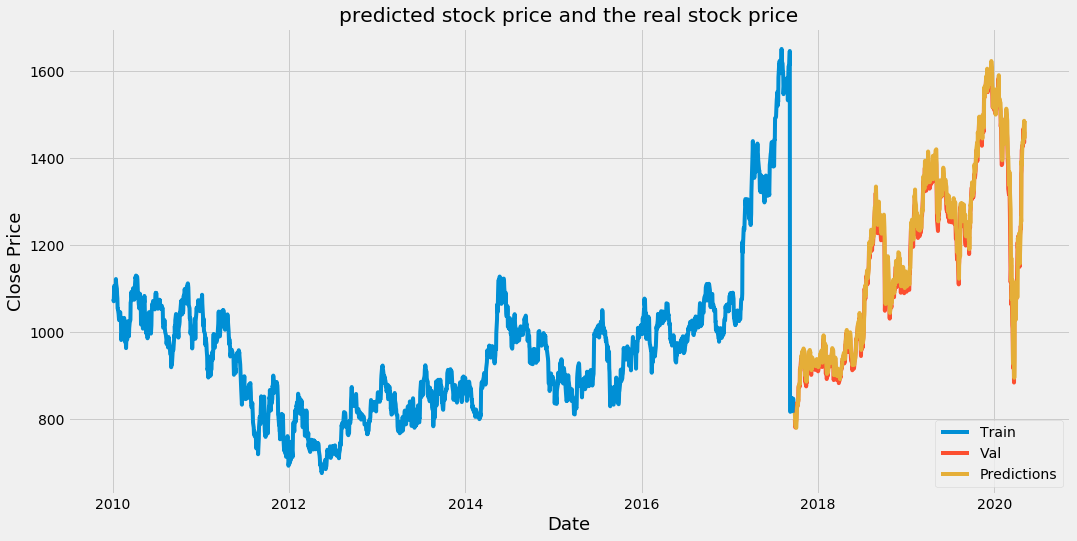

In [24]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('predicted stock price and the real stock price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#Show the valid and predicted prices
valid[-5:]

,Close,Predictions
Date,,
2020-04-29,1426.95,1434.696777
2020-04-30,1466.00,1436.147705
2020-05-04,1435.20,1485.101562
2020-05-05,1460.65,1444.951660
2020-05-06,1460.75,1484.687378


In [26]:
#Create a new dataframe
new_df = df.filter(['Close'])

#Get teh last 30 day closing price 
last_30_days = new_df[-30:].values
#Scale the data to be values between 0 and 1
last_30_days_scaled = scaler.transform(last_30_days)
#Create an empty list
X_test = []
#Append teh past 1 days
X_test.append(last_30_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1481.9481]]


In [27]:
newdf = df.filter(['Close'])
 
last_30_days = newdf[-30:].values
last_30_days_scaled = scaler.transform(last_30_days)

X_test = []
X_test.append(last_30_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1481.9481]]
